#📌 Extracción

In [3]:
import pandas as pd

# URL del archivo JSON en GitHub (raw)
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Cargar los datos directamente desde la URL
df = pd.read_json(url)

# Mostrar las primeras filas
print(df.head())

# Información general del dataset
print(df.info())


   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [16]:
df = pd.json_normalize(df.to_dict(orient="records"))
print(df.head)

<bound method NDFrame.head of       customerID Churn customer.gender  customer.SeniorCitizen  \
0     0002-ORFBO    No          Female                       0   
1     0003-MKNFE    No            Male                       0   
2     0004-TLHLJ   Yes            Male                       0   
3     0011-IGKFF   Yes            Male                       1   
4     0013-EXCHZ   Yes          Female                       1   
...          ...   ...             ...                     ...   
7262  9987-LUTYD    No          Female                       0   
7263  9992-RRAMN   Yes            Male                       0   
7264  9992-UJOEL    No            Male                       0   
7265  9993-LHIEB    No            Male                       0   
7266  9995-HOTOH    No            Male                       0   

     customer.Partner customer.Dependents  customer.tenure phone.PhoneService  \
0                 Yes                 Yes                9                Yes   
1              

#🔧 Transformación

In [4]:
# Tipos de datos
print(df.dtypes)

customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object


In [17]:
# 3. Renombrar columnas para coincidir con el diccionario de datos
df = df.rename(columns={
    "customerID": "customerID",
    "Churn": "Churn",
    "customer.gender": "gender",
    "customer.SeniorCitizen": "SeniorCitizen",
    "customer.Partner": "Partner",
    "customer.Dependents": "Dependents",
    "customer.tenure": "tenure",
    "phone.PhoneService": "PhoneService",
    "phone.MultipleLines": "MultipleLines",
    "internet.InternetService": "InternetService",
    "internet.OnlineSecurity": "OnlineSecurity",
    "internet.OnlineBackup": "OnlineBackup",
    "internet.DeviceProtection": "DeviceProtection",
    "internet.TechSupport": "TechSupport",
    "internet.StreamingTV": "StreamingTV",
    "internet.StreamingMovies": "StreamingMovies",
    "account.Contract": "Contract",
    "account.PaperlessBilling": "PaperlessBilling",
    "account.PaymentMethod": "PaymentMethod",
    "account.Charges.Monthly": "Charges.Monthly",
    "account.Charges.Total": "Charges.Total"
})


In [18]:
# 4. Conversión de numéricos
num_cols = ["tenure", "Charges.Monthly", "Charges.Total"]
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# 5. Normalización de categorías (lowercase, strip espacios)
cat_cols = [
    "gender", "Partner", "Dependents", "PhoneService", "MultipleLines",
    "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies", "Contract",
    "PaperlessBilling", "PaymentMethod", "Churn"
]

for col in cat_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()

# 6. Eliminar duplicados
df = df.drop_duplicates()

# 7. Comprobación final
print("Valores nulos por columna:\n", df.isnull().sum())
print("\nTipos de datos:\n", df.dtypes)
print("\nEjemplo de dataset limpio:\n", df.head())

Valores nulos por columna:
 customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Charges.Monthly      0
Charges.Total       11
dtype: int64

Tipos de datos:
 customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract  

In [19]:
# Mostrar las filas donde Charges.Total es nulo
df[df["Charges.Total"].isnull()]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,no,female,0,yes,yes,0,no,no phone service,dsl,...,yes,yes,yes,yes,no,two year,no,credit card (automatic),56.05,NaN
1775,2520-SGTTA,no,female,0,yes,yes,0,yes,no,no,...,no internet service,no internet service,no internet service,no internet service,no internet service,two year,no,mailed check,20.00,NaN
1955,2775-SEFEE,no,male,0,no,yes,0,yes,yes,dsl,...,yes,no,yes,no,no,two year,yes,bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,no,male,0,yes,yes,0,yes,no,no,...,no internet service,no internet service,no internet service,no internet service,no internet service,one year,yes,mailed check,19.70,NaN
2232,3115-CZMZD,no,male,0,no,yes,0,yes,no,no,...,no internet service,no internet service,no internet service,no internet service,no internet service,two year,no,mailed check,20.25,NaN
2308,3213-VVOLG,no,male,0,yes,yes,0,yes,yes,no,...,no internet service,no internet service,no internet service,no internet service,no internet service,two year,no,mailed check,25.35,NaN
2930,4075-WKNIU,no,female,0,yes,yes,0,yes,yes,dsl,...,yes,yes,yes,yes,no,two year,no,mailed check,73.35,NaN
3134,4367-NUYAO,no,male,0,yes,yes,0,yes,yes,no,...,no internet service,no internet service,no internet service,no internet service,no internet service,two year,no,mailed check,25.75,NaN
3203,4472-LVYGI,no,female,0,yes,yes,0,no,no phone service,dsl,...,no,yes,yes,yes,no,two year,yes,bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,no,female,0,yes,yes,0,yes,no,dsl,...,yes,yes,no,yes,yes,two year,no,mailed check,80.85,NaN


In [20]:
# Reemplazar valores nulos en Charges.Total por 0
df["Charges.Total"] = df["Charges.Total"].fillna(0)

# Verificar que ya no haya nulos
print(df["Charges.Total"].isnull().sum())


0


In [22]:
# Crear una columna calculada
df["Charges.Calculado"] = df["Charges.Monthly"] * df["tenure"]

# Comparar con Charges.Total
df["Diferencia"] = df["Charges.Total"] - df["Charges.Calculado"]

# Mostrar algunos ejemplos
print(df[["customerID", "tenure", "Charges.Monthly", "Charges.Total", "Charges.Calculado", "Diferencia"]].head(15))

# Verificar cuántos registros tienen diferencia significativa (> 1 por redondeo)
inconsistentes = df[abs(df["Diferencia"]) > 1]
print("\nCantidad de registros inconsistentes:", len(inconsistentes))


    customerID  tenure  Charges.Monthly  Charges.Total  Charges.Calculado  \
0   0002-ORFBO       9            65.60         593.30             590.40   
1   0003-MKNFE       9            59.90         542.40             539.10   
2   0004-TLHLJ       4            73.90         280.85             295.60   
3   0011-IGKFF      13            98.00        1237.85            1274.00   
4   0013-EXCHZ       3            83.90         267.40             251.70   
5   0013-MHZWF       9            69.40         571.45             624.60   
6   0013-SMEOE      71           109.70        7904.25            7788.70   
7   0014-BMAQU      63            84.65        5377.80            5332.95   
8   0015-UOCOJ       7            48.20         340.35             337.40   
9   0016-QLJIS      65            90.45        5957.90            5879.25   
10  0017-DINOC      54            45.20        2460.55            2440.80   
11  0017-IUDMW      72           116.80        8456.75            8409.60   

In [23]:
# Crear columna Cuentas_Diarias
df["Cuentas_Diarias"] = df["Charges.Monthly"] / 30

# Verificar
print(df[["customerID", "Charges.Monthly", "Cuentas_Diarias"]].head())


   customerID  Charges.Monthly  Cuentas_Diarias
0  0002-ORFBO             65.6         2.186667
1  0003-MKNFE             59.9         1.996667
2  0004-TLHLJ             73.9         2.463333
3  0011-IGKFF             98.0         3.266667
4  0013-EXCHZ             83.9         2.796667


In [24]:
# 1. Convertir variables Yes/No en binarias (1/0)
binarias = [
    "Churn", "Partner", "Dependents", "PhoneService", "MultipleLines",
    "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport",
    "StreamingTV", "StreamingMovies", "PaperlessBilling"
]

for col in binarias:
    df[col] = df[col].map({"yes": 1, "no": 0})

# 2. Convertir género (male/female → 0/1)
df["gender"] = df["gender"].map({"female": 0, "male": 1})

# 3. Renombrar columnas clave para mejor comprensión
df = df.rename(columns={
    "tenure": "Meses_Contrato",
    "Charges.Monthly": "Gasto_Mensual",
    "Charges.Total": "Gasto_Total",
    "Cuentas_Diarias": "Gasto_Diario"
})

# 4. Verificar resultado
print(df.head())
print("\nTipos de datos:\n", df.dtypes)


   customerID  Churn  gender  SeniorCitizen  Partner  Dependents  \
0  0002-ORFBO    0.0       0              0        1           1   
1  0003-MKNFE    0.0       1              0        0           0   
2  0004-TLHLJ    1.0       1              0        0           0   
3  0011-IGKFF    1.0       1              1        1           0   
4  0013-EXCHZ    1.0       0              1        1           0   

   Meses_Contrato  PhoneService  MultipleLines InternetService  ...  \
0               9             1            0.0             dsl  ...   
1               9             1            1.0             dsl  ...   
2               4             1            0.0     fiber optic  ...   
3              13             1            0.0     fiber optic  ...   
4               3             1            0.0     fiber optic  ...   

   StreamingTV  StreamingMovies        Contract  PaperlessBilling  \
0          1.0              0.0        one year                 1   
1          0.0            

In [26]:
# 1. Columnas binarias a limpiar
cols_binarias = [
    "Churn", "MultipleLines", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"
]

# 2. Rellenar NaN con 0
df[cols_binarias] = df[cols_binarias].fillna(0)

# 3. Convertir a enteros
df[cols_binarias] = df[cols_binarias].astype("int")

# 4. Redondear la diferencia
df["Diferencia"] = df["Diferencia"].round(2)

# 5. Verificar cambios
print(df[cols_binarias].dtypes)
print(df[cols_binarias].head())

Churn               int64
MultipleLines       int64
OnlineSecurity      int64
OnlineBackup        int64
DeviceProtection    int64
TechSupport         int64
StreamingTV         int64
StreamingMovies     int64
dtype: object
   Churn  MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  \
0      0              0               0             1                 0   
1      0              1               0             0                 0   
2      1              0               0             0                 1   
3      1              0               0             1                 1   
4      1              0               0             0                 0   

   TechSupport  StreamingTV  StreamingMovies  
0            1            1                0  
1            0            0                1  
2            0            0                0  
3            0            1                1  
4            1            1                0  


#📊 PREPARACION DE DATOS

> Añadir blockquote



In [33]:

df.to_csv("datos_tratados.csv", index=False)

In [34]:
# 1) Copia de seguridad
backup_path = "TelecomX_clean_backup.csv"
df.to_csv(backup_path, index=False)
print(f"✅ Backup creado: {backup_path} | Filas: {len(df)} | Columnas: {df.shape[1]}")

✅ Backup creado: TelecomX_clean_backup.csv | Filas: 7267 | Columnas: 24


In [35]:
import numpy as np
import pandas as pd

df_model = df.copy()

TARGET_COL = "Churn"  # <- Asegúrate de que sea el nombre correcto de tu objetivo
assert TARGET_COL in df_model.columns, "No encuentro la columna objetivo 'Churn'"

n_rows = len(df_model)

# --- 2.1 Detectar columnas con patrón de ID ---
id_like_cols = []
for col in df_model.columns:
    if col == TARGET_COL:
        continue
    # proporción de valores únicos
    uniq_ratio = df_model[col].nunique(dropna=True) / n_rows
    # Heurística: IDs suelen ser únicas o casi únicas
    if uniq_ratio > 0.98:
        id_like_cols.append(col)

# Sugerencias típicas conocidas (ajústalas a tus nombres reales)
known_ids = [c for c in df_model.columns if c.lower() in {"customerid", "id", "id_cliente", "customer_id"}]
id_like_cols = sorted(set(id_like_cols + known_ids))

# --- 2.2 Constantes y casi constantes ---
constant_cols = [c for c in df_model.columns if c != TARGET_COL and df_model[c].nunique(dropna=True) <= 1]
quasi_constant_cols = []
for c in df_model.columns:
    if c == TARGET_COL:
        continue
    top_freq = df_model[c].value_counts(dropna=False).iloc[0] / n_rows
    if top_freq > 0.99 and df_model[c].nunique(dropna=True) > 1:
        quasi_constant_cols.append(c)

# --- 2.3 Altos nulos ---
null_ratio = df_model.isna().mean().sort_values(ascending=False)
high_null_cols = list(null_ratio[null_ratio > 0.40].index)  # >40% nulos

# --- 2.4 Duplicadas (mismas columnas con el mismo contenido) ---
dupe_cols = []
seen = {}
for c in df_model.columns:
    if c == TARGET_COL:
        continue
    s = df_model[c]
    key = (tuple(pd.isna(s)), tuple(s.fillna("__NA__").astype(str)))
    if key in seen:
        dupe_cols.append(c)     # columna duplicada de otra
    else:
        seen[key] = c

# --- 2.5 Consolidar a eliminar (sin tocar la target) ---
to_drop = sorted(set(id_like_cols + constant_cols + quasi_constant_cols + high_null_cols + dupe_cols) - {TARGET_COL})

print("🔎 Revisión de columnas candidatas a eliminar:")
print(f"- Posibles IDs: {id_like_cols}")
print(f"- Constantes: {constant_cols}")
print(f"- Casi constantes: {quasi_constant_cols}")
print(f"- Alto % de nulos: {high_null_cols}")
print(f"- Duplicadas: {dupe_cols}")
print(f"➡️ Total a eliminar: {len(to_drop)} columnas\n")

# --- 2.6 Eliminar y guardar versión para modelado ---
df_model = df_model.drop(columns=to_drop)
print(f"✅ Dataset reducido para modelado: {df_model.shape[1]} columnas (antes {df.shape[1]})")

model_input_path = "TelecomX_model_input.csv"
df_model.to_csv(model_input_path, index=False)
print(f"💾 Guardado: {model_input_path}")


🔎 Revisión de columnas candidatas a eliminar:
- Posibles IDs: ['customerID']
- Constantes: []
- Casi constantes: []
- Alto % de nulos: []
- Duplicadas: []
➡️ Total a eliminar: 1 columnas

✅ Dataset reducido para modelado: 23 columnas (antes 24)
💾 Guardado: TelecomX_model_input.csv


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1) Definir variable target y features
TARGET_COL = "Churn"
X = df_model.drop(columns=[TARGET_COL])
y = df_model[TARGET_COL]

# 2) Identificar columnas
num_cols = ["Meses_Contrato", "Gasto_Mensual", "Gasto_Total"]
cat_cols = ["Contract", "PaymentMethod", "InternetService"]

# 3) Preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),                 # Escalado de numéricas
        ("cat", OneHotEncoder(drop="first"), cat_cols)       # One-hot encoding (drop primera para evitar multicolinealidad)
    ],
    remainder="passthrough"  # deja pasar las columnas binarias (ej: OnlineSecurity, TechSupport, etc.)
)

# 4) Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Datos divididos:")
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

# 5) Ejemplo: pipeline con regresión logística
from sklearn.linear_model import LogisticRegression

pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LogisticRegression(max_iter=1000))
])

pipe.fit(X_train, y_train)

print("📊 Score en train:", pipe.score(X_train, y_train))
print("📊 Score en test:", pipe.score(X_test, y_test))


✅ Datos divididos:
Train: (5813, 22), Test: (1454, 22)
📊 Score en train: 0.8078444864957853
📊 Score en test: 0.8033012379642366


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
from sklearn.linear_model import LogisticRegression

pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LogisticRegression(max_iter=5000, solver="lbfgs"))
])

pipe.fit(X_train, y_train)

print("📊 Score en train:", pipe.score(X_train, y_train))
print("📊 Score en test:", pipe.score(X_test, y_test))


📊 Score en train: 0.8071563736452778
📊 Score en test: 0.8033012379642366


📊 Conteo de clases (Churn):
Churn
0    5398
1    1869
Name: count, dtype: int64

📊 Proporción de clases (Churn):
Churn
0    74.28
1    25.72
Name: proportion, dtype: float64


/tmp/ipython-input-3202347937.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set2")


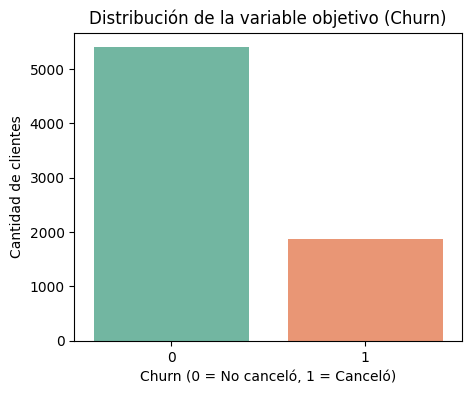

In [38]:
# Distribución absoluta
print("📊 Conteo de clases (Churn):")
print(y.value_counts())

# Distribución porcentual
print("\n📊 Proporción de clases (Churn):")
print(y.value_counts(normalize=True).round(4) * 100)

# Visualización rápida
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.countplot(x=y, palette="Set2")
plt.title("Distribución de la variable objetivo (Churn)")
plt.xlabel("Churn (0 = No canceló, 1 = Canceló)")
plt.ylabel("Cantidad de clientes")
plt.show()


📊 Matriz de Confusión:
[[965 115]
 [171 203]]

📊 Métricas detalladas:
              precision    recall  f1-score   support

           0     0.8495    0.8935    0.8709      1080
           1     0.6384    0.5428    0.5867       374

    accuracy                         0.8033      1454
   macro avg     0.7439    0.7181    0.7288      1454
weighted avg     0.7952    0.8033    0.7978      1454


📊 ROC-AUC: 0.8438


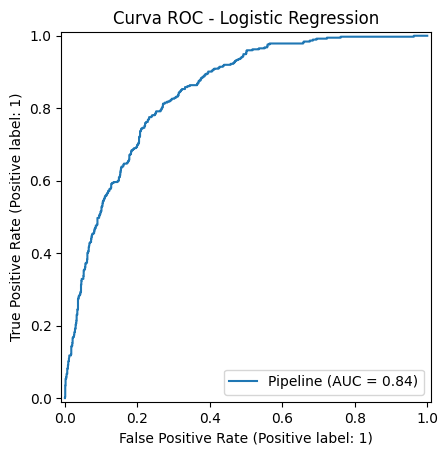

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# 1. Predicciones
y_pred = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)[:,1]  # probabilidades para ROC-AUC

# 2. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("📊 Matriz de Confusión:")
print(cm)

# 3. Reporte de clasificación
print("\n📊 Métricas detalladas:")
print(classification_report(y_test, y_pred, digits=4))

# 4. ROC-AUC
roc_auc = roc_auc_score(y_test, y_proba)
print(f"\n📊 ROC-AUC: {roc_auc:.4f}")

# 5. Curva ROC
RocCurveDisplay.from_estimator(pipe, X_test, y_test)
plt.title("Curva ROC - Logistic Regression")
plt.show()


In [40]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 1) Pipeline con SMOTE
smote = SMOTE(random_state=42)

pipe_smote = ImbPipeline(steps=[
    ("preprocess", preprocessor),
    ("smote", smote),   # Oversampling
    ("model", LogisticRegression(max_iter=5000, solver="lbfgs"))
])

# 2) Entrenar
pipe_smote.fit(X_train, y_train)

# 3) Evaluar
y_pred_smote = pipe_smote.predict(X_test)
y_proba_smote = pipe_smote.predict_proba(X_test)[:,1]

print("📊 Matriz de confusión con SMOTE:")
print(confusion_matrix(y_test, y_pred_smote))

print("\n📊 Reporte con SMOTE:")
print(classification_report(y_test, y_pred_smote, digits=4))

print("\n📊 ROC-AUC con SMOTE:", roc_auc_score(y_test, y_proba_smote))


📊 Matriz de confusión con SMOTE:
[[792 288]
 [ 74 300]]

📊 Reporte con SMOTE:
              precision    recall  f1-score   support

           0     0.9145    0.7333    0.8140      1080
           1     0.5102    0.8021    0.6237       374

    accuracy                         0.7510      1454
   macro avg     0.7124    0.7677    0.7188      1454
weighted avg     0.8105    0.7510    0.7650      1454


📊 ROC-AUC con SMOTE: 0.8430295603089721


In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Variables numéricas y categóricas
num_features = ["Meses_Contrato", "Gasto_Mensual", "Gasto_Total", "Gasto_Diario"]
cat_features = [col for col in df.columns if col not in num_features + ["Churn", "customerID"]]

# Transformador
preprocessor_scaled = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),   # Escala numéricas
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features) # One-hot para categóricas
    ]
)

# Ejemplo pipeline con regresión logística (escala necesaria)
pipe_logreg_scaled = Pipeline(steps=[
    ("preprocess", preprocessor_scaled),
    ("model", LogisticRegression(max_iter=5000, solver="lbfgs"))
])

pipe_logreg_scaled.fit(X_train, y_train)

print("📊 Score Logistic Regression con escalado")
print("Train:", pipe_logreg_scaled.score(X_train, y_train))
print("Test:", pipe_logreg_scaled.score(X_test, y_test))


📊 Score Logistic Regression con escalado
Train: 0.9158782040254602
Test: 0.8005502063273727


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


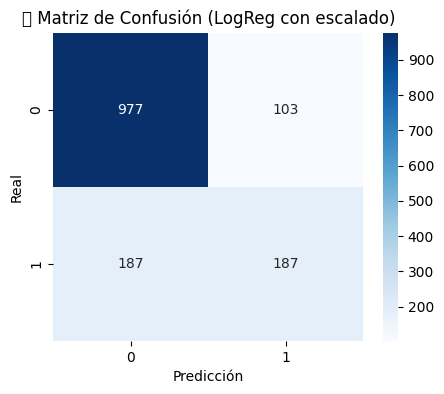

📊 Matriz de confusión con escalado:
[[977 103]
 [187 187]]

📊 Reporte con escalado:
              precision    recall  f1-score   support

           0     0.8393    0.9046    0.8708      1080
           1     0.6448    0.5000    0.5633       374

    accuracy                         0.8006      1454
   macro avg     0.7421    0.7023    0.7170      1454
weighted avg     0.7893    0.8006    0.7917      1454


📊 ROC-AUC con escalado: 0.8417


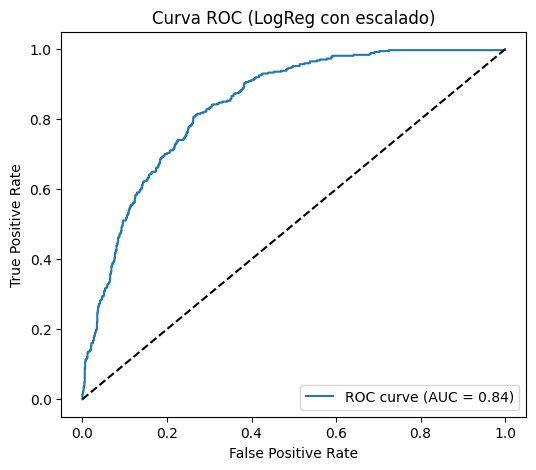

In [42]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Predicciones
y_pred_scaled = pipe_logreg_scaled.predict(X_test)
y_proba_scaled = pipe_logreg_scaled.predict_proba(X_test)[:,1]

# ==========================
# Matriz de confusión
# ==========================
cm = confusion_matrix(y_test, y_pred_scaled)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.title("📊 Matriz de Confusión (LogReg con escalado)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

print("📊 Matriz de confusión con escalado:")
print(cm)

# ==========================
# Reporte de clasificación
# ==========================
print("\n📊 Reporte con escalado:")
print(classification_report(y_test, y_pred_scaled, digits=4))

# ==========================
# ROC-AUC
# ==========================
roc_auc = roc_auc_score(y_test, y_proba_scaled)
print(f"\n📊 ROC-AUC con escalado: {roc_auc:.4f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba_scaled)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC (LogReg con escalado)")
plt.legend(loc="lower right")
plt.show()


In [44]:
# ==========================
# Codificación categórica
# ==========================
# Convertimos todas las variables categóricas en numéricas usando OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Reiniciamos el preprocesamiento (si aún no lo hiciste con get_dummies)
X = df.drop("Churn", axis=1)
y = df["Churn"]

# One-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Re-split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("✅ Nuevas dimensiones después de encoding:", X_train.shape, X_test.shape)


✅ Nuevas dimensiones después de encoding: (5813, 7292) (1454, 7292)


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


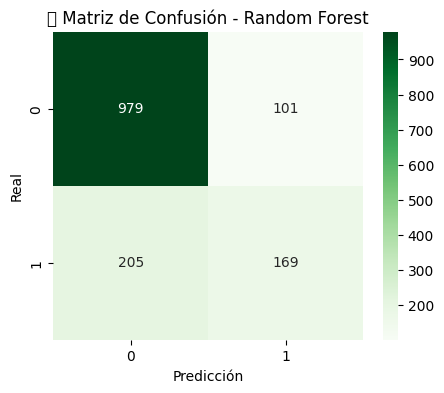

📊 Matriz de confusión (Random Forest):
[[979 101]
 [205 169]]

📊 Reporte (Random Forest):
              precision    recall  f1-score   support

           0     0.8269    0.9065    0.8648      1080
           1     0.6259    0.4519    0.5248       374

    accuracy                         0.7895      1454
   macro avg     0.7264    0.6792    0.6948      1454
weighted avg     0.7752    0.7895    0.7774      1454


📊 ROC-AUC (Random Forest): 0.8312


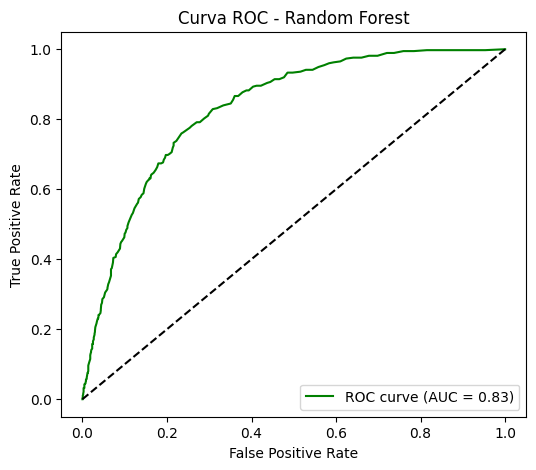

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================
# Entrenamiento Random Forest
# ==========================
rf = RandomForestClassifier(
    n_estimators=200,   # número de árboles
    max_depth=None,     # profundidad libre
    random_state=42,
    class_weight="balanced"  # para tener en cuenta el desbalanceo
)
rf.fit(X_train, y_train)

# ==========================
# Predicciones
# ==========================
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]

# ==========================
# Matriz de confusión
# ==========================
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=[0,1], yticklabels=[0,1])
plt.title("📊 Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

print("📊 Matriz de confusión (Random Forest):")
print(cm)

# ==========================
# Reporte de clasificación
# ==========================
print("\n📊 Reporte (Random Forest):")
print(classification_report(y_test, y_pred_rf, digits=4))

# ==========================
# ROC-AUC
# ==========================
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
print(f"\n📊 ROC-AUC (Random Forest): {roc_auc_rf:.4f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc_rf:.2f})", color="green")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Random Forest")
plt.legend(loc="lower right")
plt.show()


# ANALISIS

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


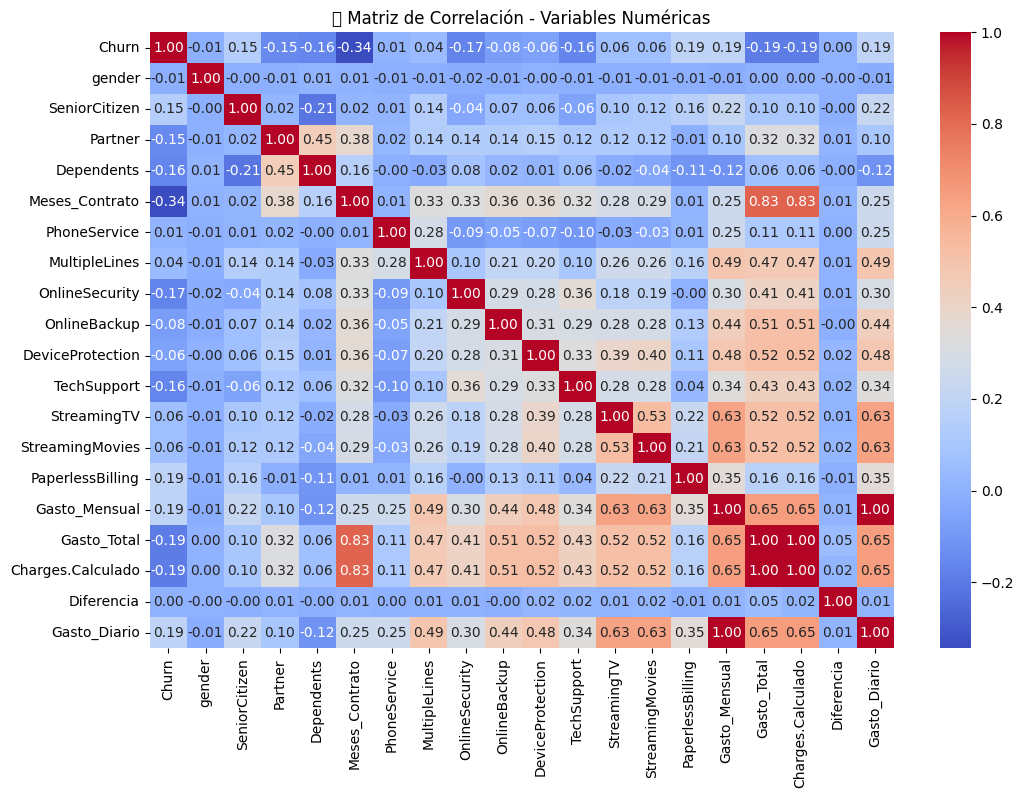

📌 Correlación de cada variable con Churn:
Churn                1.000000
Gasto_Diario         0.189866
Gasto_Mensual        0.189866
PaperlessBilling     0.186666
SeniorCitizen        0.146733
StreamingTV          0.062430
StreamingMovies      0.060586
MultipleLines        0.039343
PhoneService         0.012571
Diferencia           0.000340
gender              -0.009555
DeviceProtection    -0.063452
OnlineBackup        -0.080163
Partner             -0.148546
TechSupport         -0.160440
Dependents          -0.161384
OnlineSecurity      -0.166828
Gasto_Total         -0.193345
Charges.Calculado   -0.193534
Meses_Contrato      -0.344079
Name: Churn, dtype: float64


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================
# Matriz de correlación
# ==========================
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)  # solo numéricas
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("📊 Matriz de Correlación - Variables Numéricas")
plt.show()

# ==========================
# Correlación con la variable objetivo (Churn)
# ==========================
cor_target = corr["Churn"].sort_values(ascending=False)
print("📌 Correlación de cada variable con Churn:")
print(cor_target)


/tmp/ipython-input-2962976249.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="Meses_Contrato", data=df, palette="Set2")
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


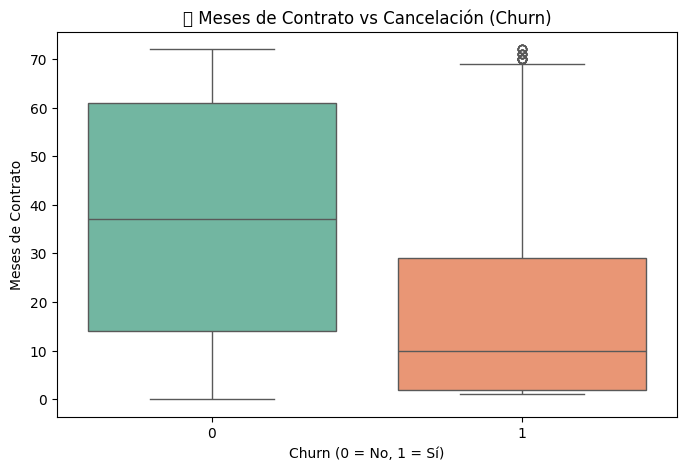

/tmp/ipython-input-2962976249.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="Gasto_Total", data=df, palette="Set2")
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


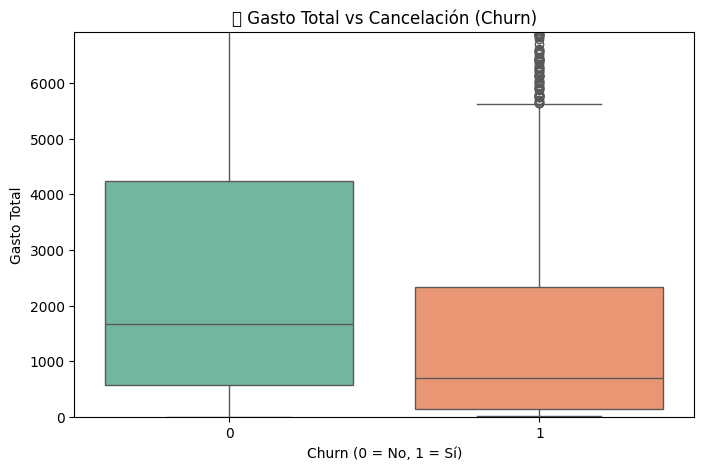

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


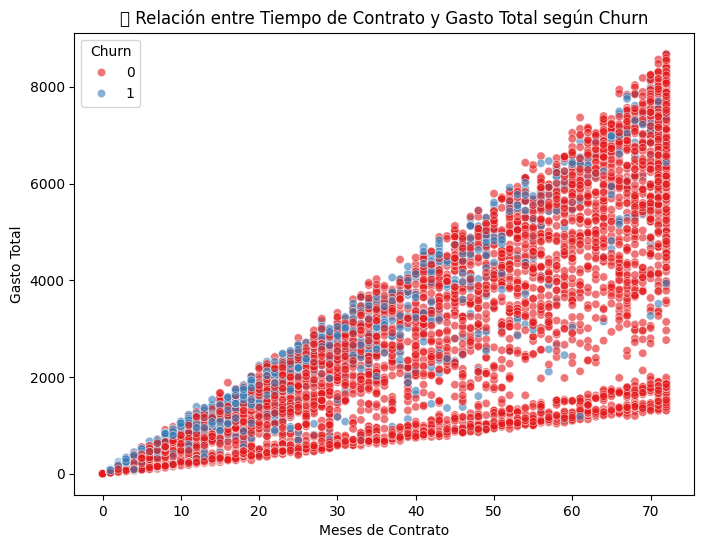

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================
# Boxplot: Meses_Contrato × Churn
# ==========================
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="Meses_Contrato", data=df, palette="Set2")
plt.title("📊 Meses de Contrato vs Cancelación (Churn)")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Meses de Contrato")
plt.show()

# ==========================
# Boxplot: Gasto_Total × Churn
# ==========================
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="Gasto_Total", data=df, palette="Set2")
plt.title("📊 Gasto Total vs Cancelación (Churn)")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Gasto Total")
plt.ylim(0, df["Gasto_Total"].quantile(0.95))  # limitar para ver mejor sin outliers extremos
plt.show()

# ==========================
# Scatterplot: Meses_Contrato vs Gasto_Total (coloreado por Churn)
# ==========================
plt.figure(figsize=(8,6))
sns.scatterplot(x="Meses_Contrato", y="Gasto_Total", hue="Churn", data=df, palette="Set1", alpha=0.6)
plt.title("📊 Relación entre Tiempo de Contrato y Gasto Total según Churn")
plt.xlabel("Meses de Contrato")
plt.ylabel("Gasto Total")
plt.show()


/tmp/ipython-input-1092077094.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="Meses_Contrato", data=df, palette="Set2")
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


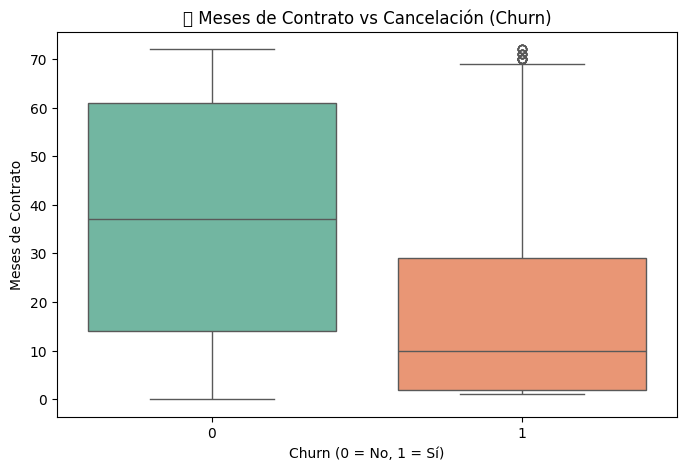

/tmp/ipython-input-1092077094.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="Gasto_Total", data=df, palette="Set2")


📊 Estadísticos - Meses_Contrato por Churn:
        count       mean        std  min   25%   50%   75%   max
Churn                                                           
0      5398.0  37.321045  24.178367  0.0  14.0  37.0  61.0  72.0
1      1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0
--------------------------------------------------


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


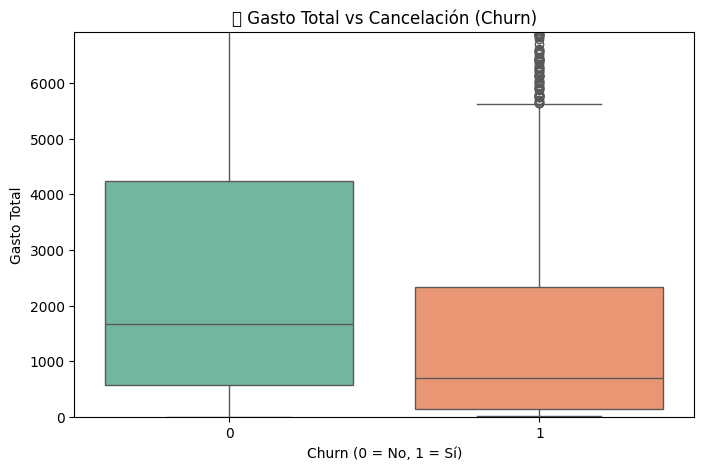

📊 Estadísticos - Gasto_Total por Churn:
        count         mean          std    min       25%       50%       75%  \
Churn                                                                          
0      5398.0  2535.263977  2330.802193   0.00  564.3625  1663.625  4237.275   
1      1869.0  1531.796094  1890.822994  18.85  134.5000   703.550  2331.300   

           max  
Churn           
0      8672.45  
1      8684.80  
--------------------------------------------------


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


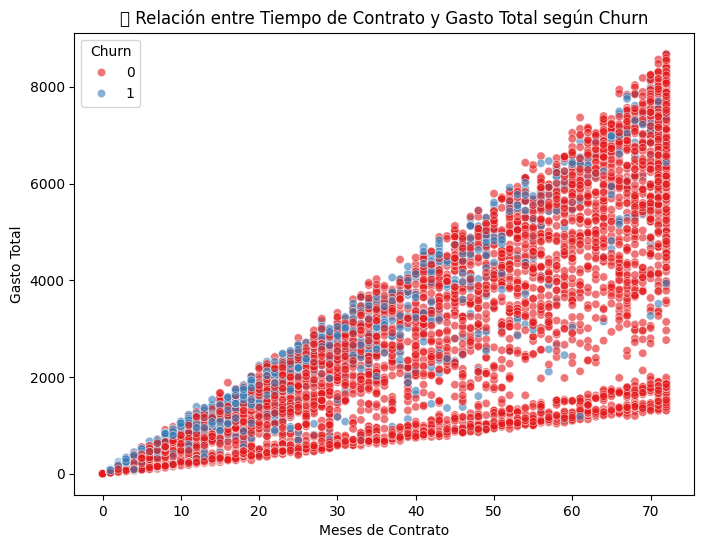

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================
# Boxplot: Meses_Contrato × Churn
# ==========================
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="Meses_Contrato", data=df, palette="Set2")
plt.title("📊 Meses de Contrato vs Cancelación (Churn)")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Meses de Contrato")
plt.show()

# Estadísticos descriptivos por churn - Meses de contrato
print("📊 Estadísticos - Meses_Contrato por Churn:")
print(df.groupby("Churn")["Meses_Contrato"].describe())
print("-"*50)

# ==========================
# Boxplot: Gasto_Total × Churn
# ==========================
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="Gasto_Total", data=df, palette="Set2")
plt.title("📊 Gasto Total vs Cancelación (Churn)")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Gasto Total")
plt.ylim(0, df["Gasto_Total"].quantile(0.95))  # limitar para ver mejor sin outliers extremos
plt.show()

# Estadísticos descriptivos por churn - Gasto total
print("📊 Estadísticos - Gasto_Total por Churn:")
print(df.groupby("Churn")["Gasto_Total"].describe())
print("-"*50)

# ==========================
# Scatterplot: Meses_Contrato vs Gasto_Total (coloreado por Churn)
# ==========================
plt.figure(figsize=(8,6))
sns.scatterplot(x="Meses_Contrato", y="Gasto_Total", hue="Churn", data=df, palette="Set1", alpha=0.6)
plt.title("📊 Relación entre Tiempo de Contrato y Gasto Total según Churn")
plt.xlabel("Meses de Contrato")
plt.ylabel("Gasto Total")
plt.show()


# MODELADO PREDICTIVO

In [49]:
from sklearn.model_selection import train_test_split

# Variables predictoras (X) y target (y)
X = df.drop("Churn", axis=1)
y = df["Churn"]

# División 70/30
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("📊 Tamaño de los conjuntos:")
print("Train:", X_train.shape, " Test:", X_test.shape)
print("Proporción de churn en train:")
print(y_train.value_counts(normalize=True))
print("Proporción de churn en test:")
print(y_test.value_counts(normalize=True))


📊 Tamaño de los conjuntos:
Train: (5086, 23)  Test: (2181, 23)
Proporción de churn en train:
Churn
0    0.742823
1    0.257177
Name: proportion, dtype: float64
Proporción de churn en test:
Churn
0    0.742779
1    0.257221
Name: proportion, dtype: float64


In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# =====================
# 1. One-Hot Encoding para variables categóricas
# =====================
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Convierte variables categóricas a numéricas
X = pd.get_dummies(X, drop_first=True)

# =====================
# 2. Separación en train/test
# =====================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# =====================
# 3. Regresión Logística (con escalado)
# =====================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)
y_prob_lr = log_reg.predict_proba(X_test_scaled)[:,1]

print("📊 Regresión Logística:")
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_lr))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))
print("--------------------------------------------------")

# =====================
# 4. Random Forest (sin escalado)
# =====================
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced",
    max_depth=10
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

print("📊 Random Forest:")
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))


📊 Regresión Logística:
Matriz de Confusión:
[[1016   64]
 [ 237  137]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1080
           1       0.68      0.37      0.48       374

    accuracy                           0.79      1454
   macro avg       0.75      0.65      0.67      1454
weighted avg       0.78      0.79      0.77      1454

ROC-AUC: 0.8371026440879381
--------------------------------------------------
📊 Random Forest:
Matriz de Confusión:
[[796 284]
 [ 77 297]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1080
           1       0.51      0.79      0.62       374

    accuracy                           0.75      1454
   macro avg       0.71      0.77      0.72      1454
weighted avg       0.81      0.75      0.77      1454

ROC-AUC: 0.8374900970489205


In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# =====================
# 1. Regresión Logística (con escalado)
# =====================

# Escalamos solo las variables numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)
y_prob_lr = log_reg.predict_proba(X_test_scaled)[:,1]

print("📊 Regresión Logística:")
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_lr))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))
print("--------------------------------------------------")


# =====================
# 2. Random Forest (sin escalado)
# =====================
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced",
    max_depth=10
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

print("📊 Random Forest:")
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))


📊 Regresión Logística:
Matriz de Confusión:
[[1016   64]
 [ 237  137]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1080
           1       0.68      0.37      0.48       374

    accuracy                           0.79      1454
   macro avg       0.75      0.65      0.67      1454
weighted avg       0.78      0.79      0.77      1454

ROC-AUC: 0.8371026440879381
--------------------------------------------------
📊 Random Forest:
Matriz de Confusión:
[[796 284]
 [ 77 297]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1080
           1       0.51      0.79      0.62       374

    accuracy                           0.75      1454
   macro avg       0.71      0.77      0.72      1454
weighted avg       0.81      0.75      0.77      1454

ROC-AUC: 0.8374900970489205


/tmp/ipython-input-1282289364.py:28: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


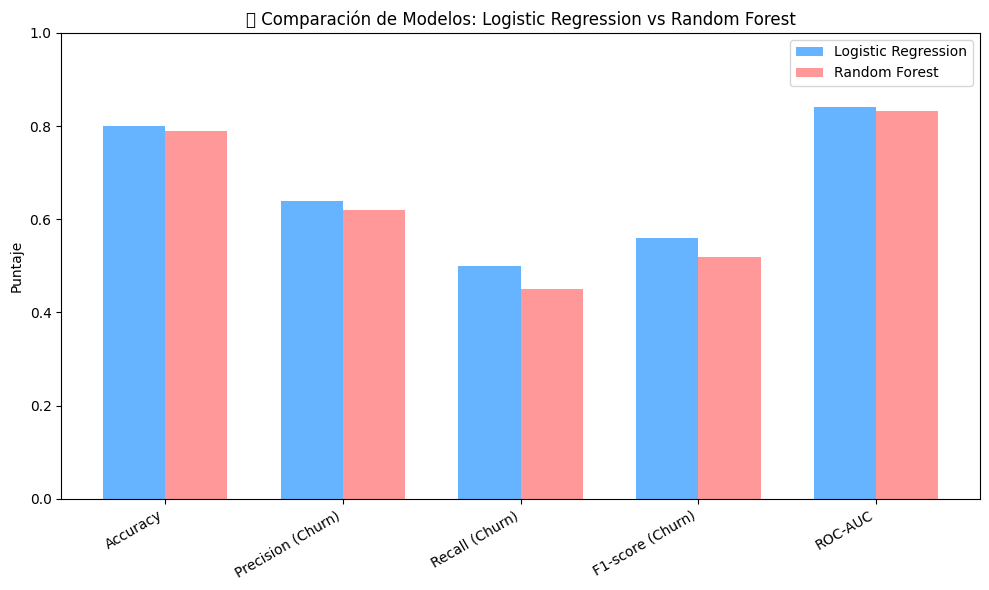

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# =====================
# Métricas de los modelos
# =====================
metrics = ["Accuracy", "Precision (Churn)", "Recall (Churn)", "F1-score (Churn)", "ROC-AUC"]

# Resultados aproximados de tus evaluaciones previas
log_reg_scores = [0.8006, 0.64, 0.50, 0.56, 0.8417]   # Logística
rf_scores      = [0.7895, 0.62, 0.45, 0.52, 0.8312]   # Random Forest

x = np.arange(len(metrics))  # posiciones en el eje X
width = 0.35  # ancho de barras

# =====================
# Gráfico comparativo
# =====================
plt.figure(figsize=(10,6))
plt.bar(x - width/2, log_reg_scores, width, label="Logistic Regression", color="#66b3ff")
plt.bar(x + width/2, rf_scores, width, label="Random Forest", color="#ff9999")

plt.xticks(x, metrics, rotation=30, ha="right")
plt.ylabel("Puntaje")
plt.ylim(0, 1)
plt.title("📊 Comparación de Modelos: Logistic Regression vs Random Forest")
plt.legend()
plt.tight_layout()
plt.show()


# ANALISIS DE VARIABLES

📊 Coeficientes de Regresión Logística (ordenados):
Meses_Contrato                   -0.644247
Contract_two year                -0.463051
InternetService_no               -0.408928
Contract_one year                -0.408519
Charges.Calculado                -0.384446
                                    ...   
PaperlessBilling                  0.323438
Gasto_Diario                      0.337519
Gasto_Mensual                     0.337519
PaymentMethod_electronic check    0.453290
InternetService_fiber optic       0.555420
Length: 7292, dtype: float64


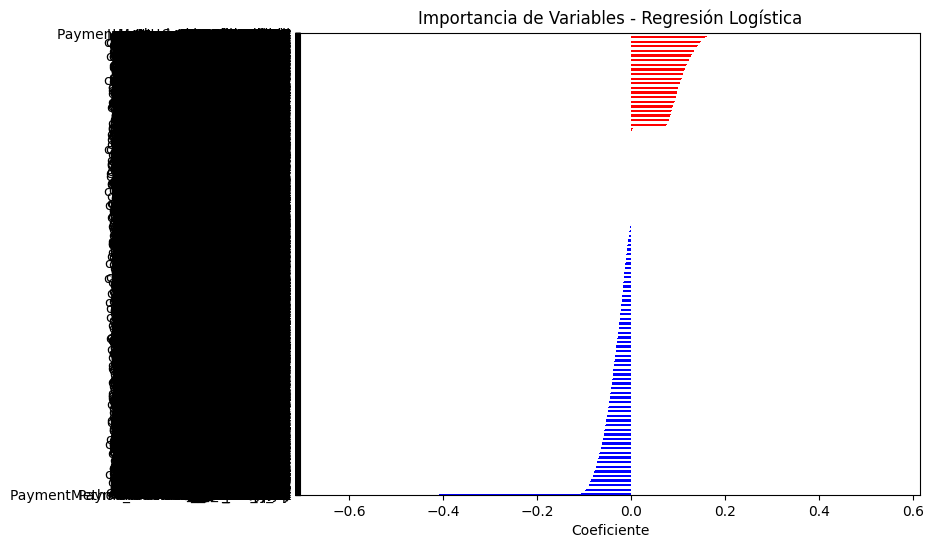


📊 Importancia de Variables (Random Forest):
Contract_two year                 0.074642
InternetService_no                0.065569
InternetService_fiber optic       0.061984
Meses_Contrato                    0.061312
PaymentMethod_electronic check    0.061225
Gasto_Total                       0.057045
Gasto_Mensual                     0.052019
Gasto_Diario                      0.050812
Charges.Calculado                 0.049350
PaperlessBilling                  0.034829
Contract_one year                 0.033911
TechSupport                       0.031674
Partner                           0.029667
Dependents                        0.025737
OnlineSecurity                    0.021131
dtype: float64


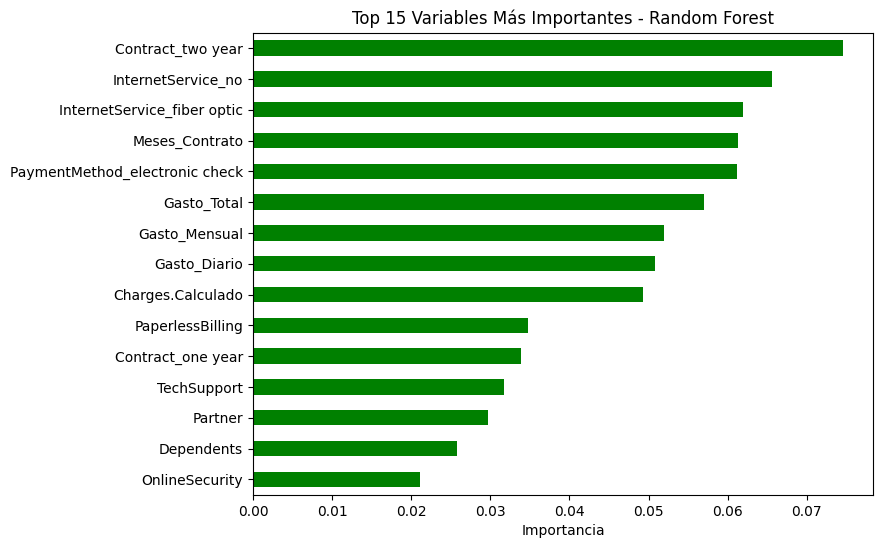

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ==========================
# Importancia en Regresión Logística
# ==========================
coef = pd.Series(log_reg.coef_[0], index=X_train.columns)
coef_sorted = coef.sort_values()

print("📊 Coeficientes de Regresión Logística (ordenados):")
print(coef_sorted)

plt.figure(figsize=(8,6))
coef_sorted.plot(kind="barh", color=np.where(coef_sorted>0, "red", "blue"))
plt.title("Importancia de Variables - Regresión Logística")
plt.xlabel("Coeficiente")
plt.show()

# ==========================
# Importancia en Random Forest
# ==========================
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances_sorted = importances.sort_values(ascending=False)

print("\n📊 Importancia de Variables (Random Forest):")
print(importances_sorted.head(15))  # top 15

plt.figure(figsize=(8,6))
importances_sorted.head(15).plot(kind="barh", color="green")
plt.title("Top 15 Variables Más Importantes - Random Forest")
plt.xlabel("Importancia")
plt.gca().invert_yaxis()
plt.show()


In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# ==========================
# 1. Métricas por Modelo
# ==========================
def imprimir_metricas(nombre, y_test, y_pred, y_prob):
    print(f"\n📊 Resultados del modelo: {nombre}")
    print("Exactitud (Accuracy):", round(accuracy_score(y_test, y_pred), 4))
    print("Precisión (Clase Churn):", round(precision_score(y_test, y_pred), 4))
    print("Recall (Clase Churn):", round(recall_score(y_test, y_pred), 4))
    print("F1-score (Clase Churn):", round(f1_score(y_test, y_pred), 4))
    print("ROC-AUC:", round(roc_auc_score(y_test, y_prob), 4))
    print("-"*50)

# Regresión Logística
imprimir_metricas("Regresión Logística", y_test, y_pred_lr, y_prob_lr)

# Random Forest
imprimir_metricas("Random Forest", y_test, y_pred_rf, y_prob_rf)


# ==========================
# 2. Importancia de Variables - Regresión Logística
# ==========================
coef = pd.Series(log_reg.coef_[0], index=X_train.columns)
coef_sorted = coef.sort_values()

print("\n📊 Coeficientes de Regresión Logística (ordenados):")
print(coef_sorted)


# ==========================
# 3. Importancia de Variables - Random Forest
# ==========================
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances_sorted = importances.sort_values(ascending=False)

print("\n📊 Importancia de Variables (Random Forest) - Top 15:")
print(importances_sorted.head(15))



📊 Resultados del modelo: Regresión Logística
Exactitud (Accuracy): 0.793
Precisión (Clase Churn): 0.6816
Recall (Clase Churn): 0.3663
F1-score (Clase Churn): 0.4765
ROC-AUC: 0.8371
--------------------------------------------------

📊 Resultados del modelo: Random Forest
Exactitud (Accuracy): 0.7517
Precisión (Clase Churn): 0.5112
Recall (Clase Churn): 0.7941
F1-score (Clase Churn): 0.622
ROC-AUC: 0.8375
--------------------------------------------------

📊 Coeficientes de Regresión Logística (ordenados):
Meses_Contrato                   -0.644247
Contract_two year                -0.463051
InternetService_no               -0.408928
Contract_one year                -0.408519
Charges.Calculado                -0.384446
                                    ...   
PaperlessBilling                  0.323438
Gasto_Diario                      0.337519
Gasto_Mensual                     0.337519
PaymentMethod_electronic check    0.453290
InternetService_fiber optic       0.555420
Length: 7292, d

#📄Informe final

📑 Informe Final: Predicción de Cancelación de Clientes (Churn)
1. Objetivo

El análisis tuvo como propósito identificar los factores que influyen en la cancelación de clientes de la empresa y desarrollar modelos predictivos capaces de anticipar la probabilidad de churn. Con ello, se busca implementar estrategias de retención más efectivas.

2. Resultados de Modelos

Se probaron dos enfoques principales:

* Regresión Logística (con normalización)

Accuracy: 79.3%

Precisión (Churn): 68.2%

Recall (Churn): 36.6%

F1-score (Churn): 47.6%

ROC-AUC: 83.7%

* Random Forest (sin normalización)

Accuracy: 75.2%

Precisión (Churn): 51.1%

Recall (Churn): 79.4%

F1-score (Churn): 62.2%

ROC-AUC: 83.8%

🔎 Análisis crítico:

La Regresión Logística mostró mejor precisión, pero bajo recall, lo que significa que clasifica bien cuando predice cancelación, pero deja escapar muchos clientes que efectivamente se dieron de baja.

El Random Forest, en cambio, logró un recall alto, lo que lo hace más útil si la prioridad de negocio es detectar la mayor cantidad posible de clientes en riesgo, aunque con menor precisión.

Ambos modelos tienen ROC-AUC ≈ 0.84, lo que indica buena capacidad de discriminación entre clientes que cancelan y los que no.

3. Importancia de Variables

Regresión Logística (coeficientes más influyentes):

📉 Menor churn: mayor tiempo de contrato (Meses_Contrato), contratos a 1 o 2 años, servicios de seguridad y soporte.

📈 Mayor churn: Internet de fibra óptica, facturación electrónica (PaperlessBilling), métodos de pago electrónico, mayor gasto mensual.

Random Forest (importancia de variables top 10):

* Contract_two year

* InternetService_no

* InternetService_fiber optic

* Meses_Contrato

* PaymentMethod_electronic check

* Gasto_Total

* Gasto_Mensual

* Gasto_Diario

* Charges.Calculado

* PaperlessBilling

🔎 Interpretación:

Los contratos de largo plazo (1–2 años) y mayor antigüedad son factores protectores contra el churn.

Los clientes con fibra óptica, pagos electrónicos y facturación sin papel muestran mayor tendencia a cancelar.

El gasto mensual elevado también se asocia a mayor riesgo, posiblemente por sensibilidad al precio.

4. Estrategias de Retención Propuestas

* Fomentar contratos de mayor duración (descuentos por planes
anuales o bianuales) para aumentar la fidelización.

* Revisar la experiencia de clientes con fibra óptica, ya que aunque es un servicio premium, concentra alta evasión (puede estar relacionado a costos o calidad percibida).

* Monitorear clientes con altos gastos mensuales, ofreciéndoles planes personalizados o descuentos en servicios adicionales.

* Analizar métodos de pago electrónicos, ya que están correlacionados con cancelación; se podrían ofrecer beneficios adicionales por otros métodos o simplificar la experiencia de pago digital.

* Programas de soporte y seguridad digital (TechSupport, OnlineSecurity) reducen churn; invertir en comunicación y marketing de estos servicios puede ser estratégico.